# BMPD HC project
## Spinal cord only - Consensus clustering

In [12]:
import sys

sys.path.append('/media/miplab-nas2/Data3/Nawal/Tools/iCAPs/')
from icap_consensus_clustering import ConsensusClustering
from icap_analyses import iCAPs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nibabel as nib
import os.path
import json
import nibabel as nib

# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. Load configuration file

In [13]:
with open('../config/hc_project_icaps_spinalcord.json') as config_file:
    config = json.load(config_file)

## 1. Define number of clusters

#### Instantiate consensus clustering object

In [14]:
consensus = ConsensusClustering(config=config)

#### Plot average consensus

/media/miplab-nas2/Data3/Nawal/Tools/iCAPs/icap_consensus_clustering.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data = self.avg_consensus, x="k", y="consensus", palette=sns.color_palette('flare', n_colors=len(self.config['k_range'])), errorbar='sd');


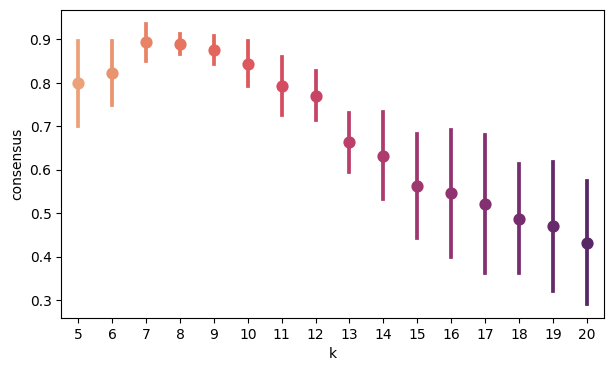

In [4]:
consensus.plot_avg_consensus()

In [16]:
consensus.avg_consensus

,k,consensus
0,7,0.945521
1,7,0.965824
2,7,0.929434
3,7,0.880111
4,7,0.894231
5,7,0.913190
6,7,0.960384


In [15]:
# Assuming df is your DataFrame containing columns 'k' and 'consensus'
# Calculate mean and standard deviation for each value of 'k'
mean_std_per_k = consensus.avg_consensus.groupby('k')['consensus'].agg(['mean', 'std'])

# Now you can access the mean and std for a specific value of 'k'
specific_k = 7  # Change this to the specific value of 'k' you're interested in
mean_for_specific_k = mean_std_per_k.loc[specific_k, 'mean']
std_for_specific_k = mean_std_per_k.loc[specific_k, 'std']
print(mean_for_specific_k)
print(std_for_specific_k)


0.9269564563193109
0.03274606119552621


In [11]:
# Assuming df is your DataFrame containing columns 'k' and 'consensus'
# Calculate mean and standard deviation for each value of 'k'
mean_std_per_k = consensus.avg_consensus.groupby('k')['consensus'].agg(['mean', 'std'])

# Now you can access the mean and std for a specific value of 'k'
specific_k = 7  # Change this to the specific value of 'k' you're interested in
mean_for_specific_k = mean_std_per_k.loc[specific_k, 'mean']
std_for_specific_k = mean_std_per_k.loc[specific_k, 'std']
print(mean_for_specific_k)
print(std_for_specific_k)


0.8442775124595367
0.05184455821787507


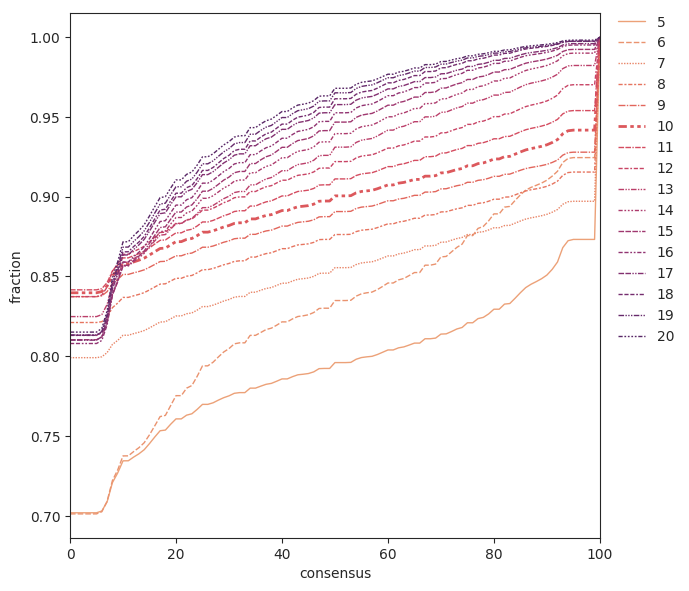

In [5]:
consensus.plot_cdf(to_highlight=[10])

#### Display iCAPs

In [27]:
icaps = iCAPs(config,17)

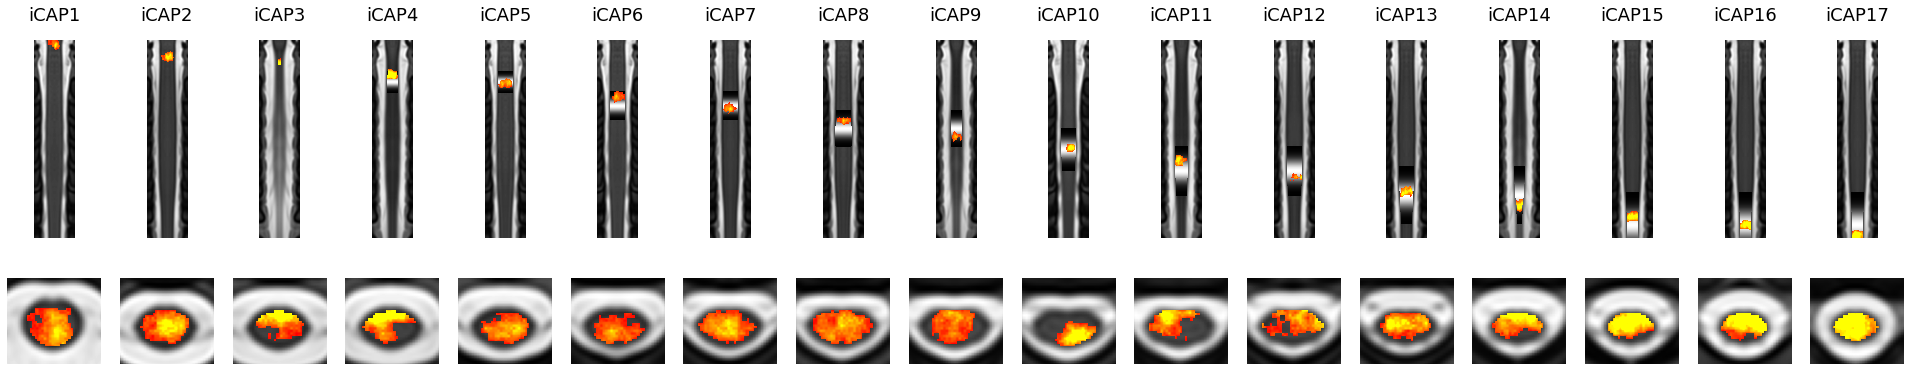

In [28]:
icaps.plot(lthresh=3.1,uthresh=6,colormap='autumn',save_results=True,show_spinal_levels=True)

In [ ]:
np.array